In [166]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [276]:
df = pd.read_csv('/thinkful/data_files/avocado.csv')
df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [275]:
df.tail(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [279]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


1.405978409775878


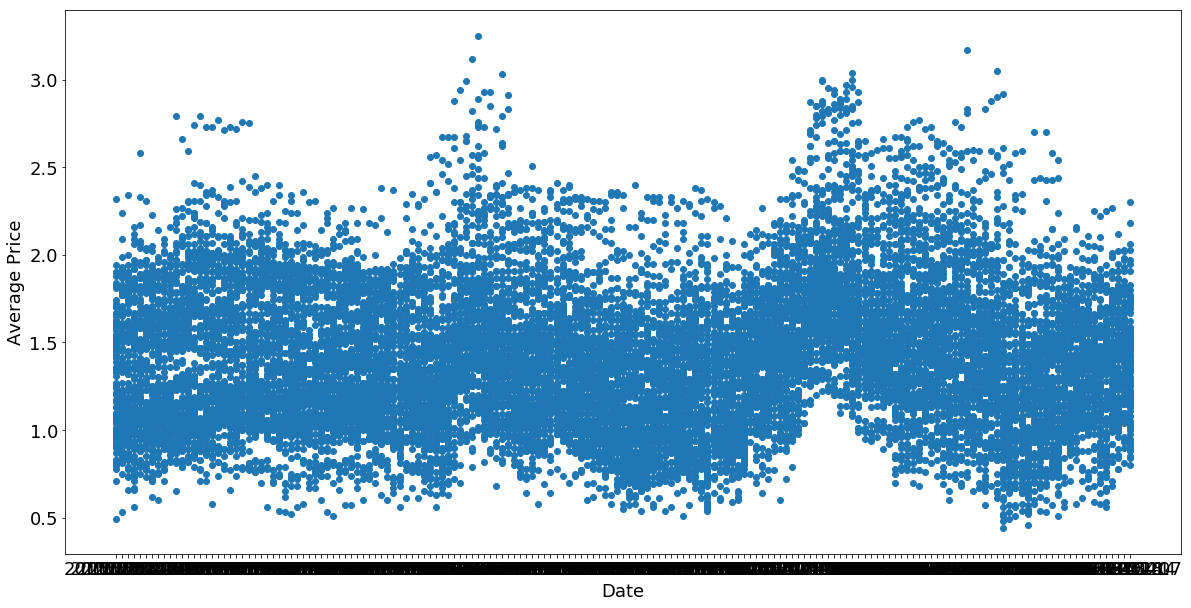

In [280]:
# First, let's see the entire scatter plot of prices, with the entire 'Date' column as the x value and the 
# entire 'AveragePrice' column as the y value. It looks like the average price over time has been about
# $1.50 per avocado. After printing the mean value of the AveragePrice column, it seems I was about .10 off. 
# for the X axis, you can see all the dates are displayed but there are too many to read clearly!

print(df.AveragePrice.mean())
x = df['Date']
y = df['AveragePrice']
# plt.scatter(x=df['Date'], y=df['AveragePrice'])
plt.scatter(x, y)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

0.44 3.25


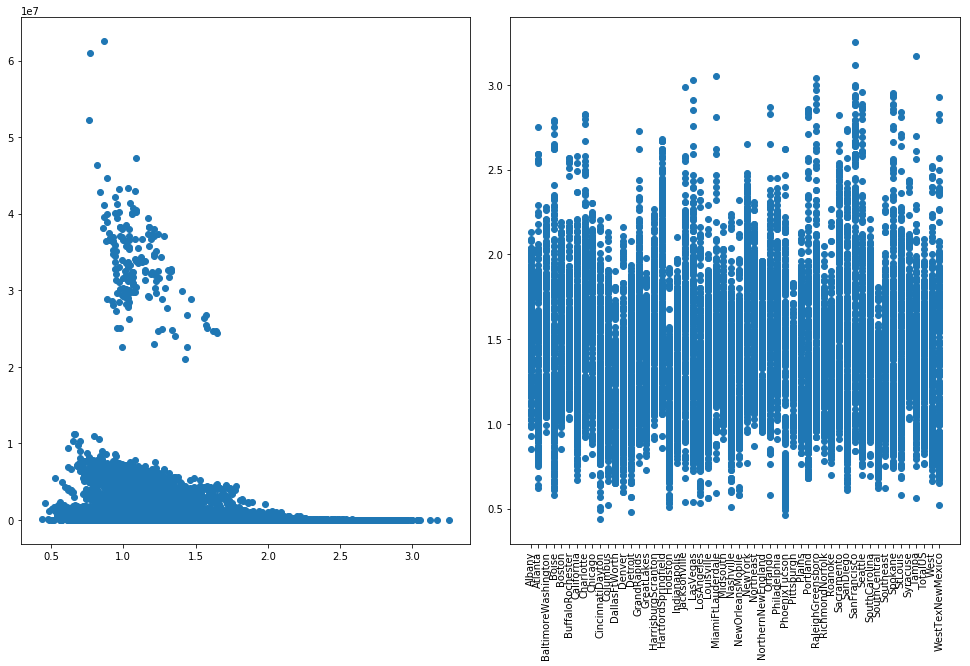

In [169]:
# Here is a subplots test; one row, two plots. The first plot is to see how AveragePrice affects Total Volume sold. 
# The second plot is to see the average price of a single avocado by region. I want to know where they were the most 
# expensive and where they were the cheapest. From the second graph, it seems the most expensive avocado sold was in 
# San Francisco, and the least expensive was in Cinncinnati/Dayton. I'm also going to print these values.
print(min(df.AveragePrice), max(df.AveragePrice))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,8))
ax1.scatter(x=df['AveragePrice'], y=df['Total Volume'])
ax2.scatter(x=df['region'], y=df['AveragePrice'])
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [273]:
# Let's just compare San Francisco, Seattle, and Portland's prices.

# I never got this working so I'm just going to leave this here for now commented out. 
# plt.scatter(x=df.loc[df['region'].isin(['SanFrancisco', 'Portland', 'Seattle']), 'region'], y=df.loc[df['AveragePrice'] > 1.00])


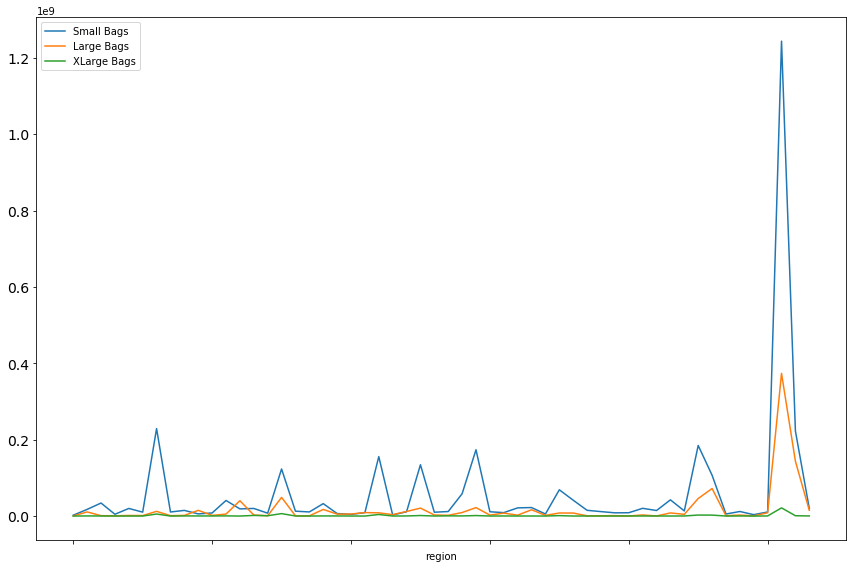

In [170]:
# This graph shows that in one region the total number of bags sold was higher but by far there were more small bags sold. th
Bags = df[['Small Bags', 'Large Bags', 'XLarge Bags']].groupby(df['region']).sum()
Bags.plot(kind='line', fontsize = 14,figsize=(12,8))
plt.tight_layout()
plt.show()


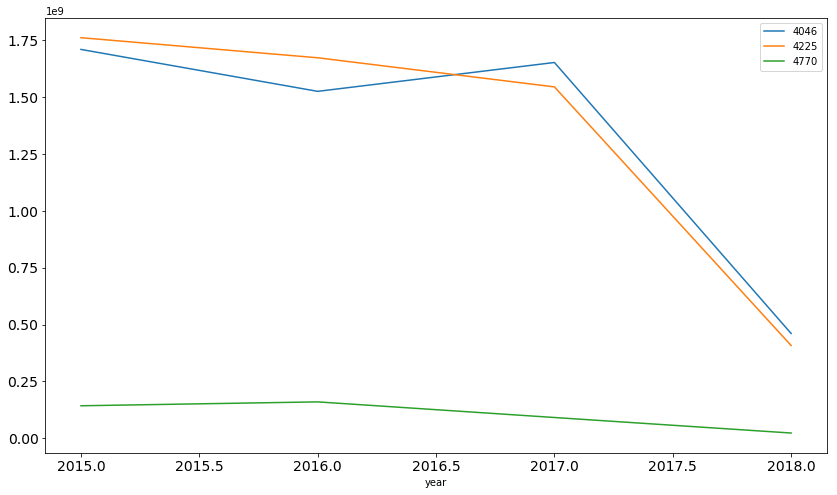

In [171]:
# PLU variants. It looks like sales of avocado types 4225 and 4046 have sharply dropped from 2017 to 2018.
variant = df[['4046', '4225', '4770']].groupby(df.year).sum()
variant.plot(kind='line', fontsize = 14, figsize=(14,8))

type
conventional    0.46
organic         0.44
Name: AveragePrice, dtype: float64
type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64
type
conventional    2.22
organic         3.25
Name: AveragePrice, dtype: float64


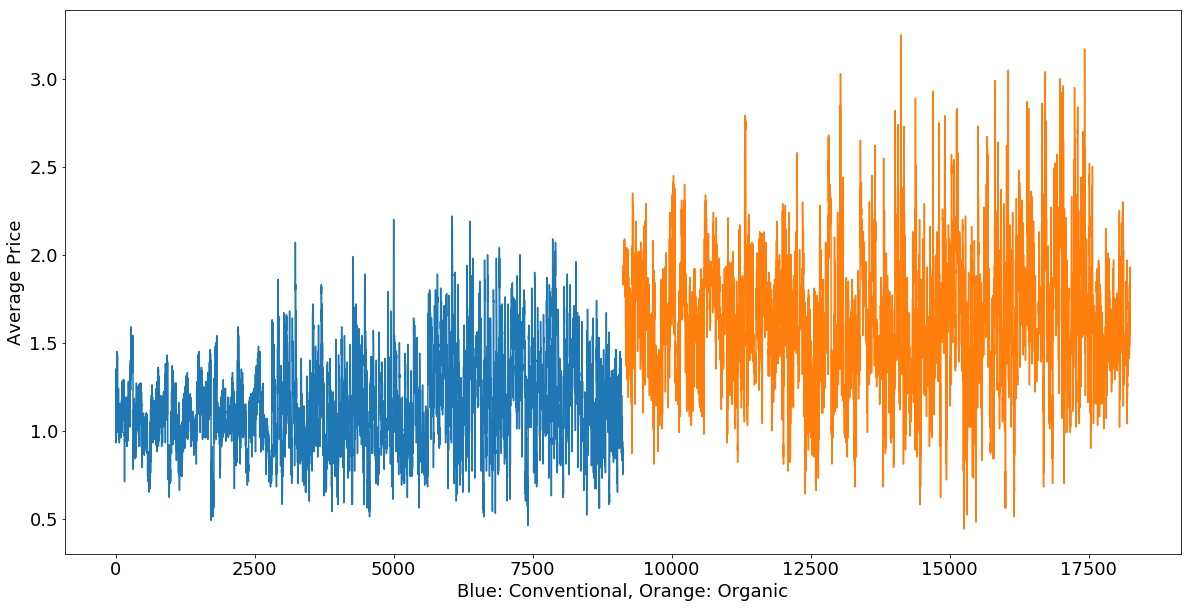

In [285]:
# Here I retrieve the minimum, mean, and max average price of conventional and organic avocados.
# Then, I plot the average price of conventional and organic avocados. This lines up with the previous data.
# Group by category
Avocado_Type = df.groupby(df['type'])

# Apply the "mean" function to the AveragePrice column
print(Avocado_Type['AveragePrice'].min())

# Apply the "mean" function to the AveragePrice column
print(Avocado_Type['AveragePrice'].mean())

# Or apply the "max" function to the age column
print(Avocado_Type['AveragePrice'].max())

Avocado_Type['AveragePrice'].plot()
plt.xlabel('Blue: Conventional, Orange: Organic')
plt.ylabel('Average Price')
plt.show()